In [1]:
import numpy as np
import itertools as itt
import time
import matplotlib.pyplot as plt

## Trabalho 1 - Cálculo Numérico

Jorge Augusto Salgado Salhani

Nro USP: 8927418

### Questão 1

Definição da classe para solução via métodos diretos (para organização e comparação, visto que não serão explicitamente necessárias)

In [10]:
"""
Classe DirectMethods

Solução de sistemas lineares via métodos diretos
"""
class DirectMethods:

  def progressive_substituition(L, b):
    """ Obter o vetor x tal que torne verdadeira a equação Lx = b

    L : ndarray
      matriz triangular inferior 2D com tipos float
    b : ndarray
      vetor de resultado 1D com tipos float
    """
    n = len(L)

    x = []
    for i in range(n):
      x_i = b[i]

      for j in range(i):
        x_i -= L[i][j] * x[j]

      x_i /= L[i][i]
      x.append(x_i)
    
    return np.array(x)

  def regressive_substitution(U, b):
    """ Obter o vetor x tal que torne verdadeira a equação Ux = b

    U : ndarray
      matriz triangular superior 2D com tipos float
    b : ndarray
      vetor de resultado 1D com tipos float
    """
    n = len(U)

    x = [0]*n
    for i in range(n-1,-1,-1):
      x_i = b[i]

      for j in range(i, n):
        x_i -= U[i][j] * x[j]

      x_i /= U[i][i]
      x[i] = x_i

    return np.array(x)

  def decomposition_lu(A):
    """ Obter o vetor decomposição LU da matriz A tal que A = LU

    A : ndarray
      2D array com tipos float
    """
    n = len(A)

    L = np.identity(n)
    U = np.zeros((n,n))

    for i in range(n):
      for j in range(n):

        if i <= j:
          sumTerm = np.sum(L[i,:i] * U[:i,j])
          U[i,j] = A[i][j] - sumTerm

        if i > j:
          sumTerm = np.sum(L[i,:j] * U[:j,j])
          L[i,j] = (A[i,j] - sumTerm) / U[j,j]

    return {'L': L, 'U': U}

  def decomposition_cholesky(A):
    """ Obter o vetor decomposição H da matriz A tal que A = H(H^T) via Cholesky

    A : ndarray
      2D array com tipos float
    """
    n = len(A)
    H = np.zeros((n,n))

    for j in range(n):
      h_ij = 0
      for i in range(j,n):

        if i == j:
          h_ij = np.sqrt(A[i,j] - sum(H[i,:i]**2))
        else:
          h_ij = (A[i,j] - sum(H[i,:i]*H[j,:i])) / H[j,j]

        H[i,j] = h_ij

    return H

  def gauss_elimination(A, b):
    """ Obter a matriz triangular superior de A via eliminação de Gauss

    A : ndarray
      2D array com tipos float
    b : ndarray
      vetor de resultado 1D com tipos float
    """
    n = len(A)

    for j in range(n):
      # Com pivot
      pivot = max(abs(A[j:,j]))
      # indice da linha que contem 'pivot' em seu triangulo inf
      p = [k for k in range(j, n) if pivot == A[k,j]]
      if not p: continue
      p = p[0]
      temp = np.array(A[p,:])
      A[p,:] = A[j,:]
      A[j,:] = temp

      temp = b[j]
      b[j] = b[p]
      b[p] = temp

      # print(A[j,j])
      for i in range(j+1,n):
        m_ij = - A[i,j] / A[j,j]
        A[i,j:] = A[i,j:] + m_ij * A[j,j:]

        b[i] = b[i] + m_ij * b[j]

    return {'A': A, 'b': b}
  
  def inverse(A):
    """ Obter a matriz inversa de A (A^(-1))

    A : ndarray
      2D array com tipos float
    """
    n = len(A)
    I = np.eye(n)

    v = []

    LU = DirectMethods.decomposition_lu(A)

    for e in I:
      y = DirectMethods.progressive_substituition(LU['L'], e)
      x = DirectMethods.regressive_substitution(LU['U'], y)

      v.append(x)

    return np.array(v).transpose()

In [11]:
"""
Retorna decomposição da matriz A em LU utilizando eliminação de Gauss
"""
def func1(A):
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  # j: indice de iteração sobre colunas
  for j in range(n-1):

    # i: indice de iteração sobre linhas, ao longo do triangulo superior (i > j)
    for i in range(j+1, n):

      # L: matriz de coeficientes m_ij da forma matricial da eliminação de Gauss
      #  será uma matriz triangular inferior
      L[i,j] = U[i,j] / U[j,j]

      U[i, j:] = U[i, j:] - L[i,j] * U[j, j:]

  return (L, U)

In [12]:
# Teste 1: utilização da função func1
A = np.array([
  [3, 2, -5],
  [2, 4, -1],
  [2, -3, -1],
])

LU = func1(A)
L = LU[0]
U = LU[1]

In [13]:
print('Matriz L = ')
print(L)
print()

print('Matriz U = ')
print(U)
print()

# Como validação, podemos fazer o retorno a A 
# de modo que A = LU
print('Original A = ')
print(A)
print()

print('Obtido LU = ')
print(np.matmul(L,U))

Matriz L = 
[[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [ 0.66666667 -2.          1.        ]]

Matriz U = 
[[ 3  2 -5]
 [ 0  2  2]
 [ 0  0  6]]

Original A = 
[[ 3  2 -5]
 [ 2  4 -1]
 [ 2 -3 -1]]

Obtido LU = 
[[ 3.          2.         -5.        ]
 [ 2.          3.33333333 -1.33333333]
 [ 2.         -2.66666667 -1.33333333]]


In [14]:
"""
Retorna decomposição da matriz A em LU utilizando eliminação de Gauss
"""
def func2(A, p):
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  # j: indice de iteração sobre as colunas 
  for j in range(n-1):
    
    v = min(n, j+p+1)

    # i: indice de iteração sobre as linhas no triangulo superior (i > j)
    #  mas considerando como final o minimo entre n (linha toda)
    #  e v (valor ...)
    for i in range(j+1, v):
      L[i,j] = U[i,j] / U[j,j]
      U[i, j:v] = U[i, j:v] - L[i,j] * U[j, j:v]

  return (L, U)

Notamos que as funções são similares, com exceção aos limites de valores que serão calculados da matriz de coeficientes L 

Para func1: (for i in range(j+1, n))

Para func1: (for i in range(j+1, v))

Onde v = min(n, j+p+1)

A diferença entre as funções ocorre na quantidade de iterações e cálculos que são realizados para cada valor do triangulo superior da matriz A

Onde $j = 0,1,2,...,n-1$ e $p$ pré definido

$$v = min(2000, 3), min(2000, 4), ..., min(2000, 2002)$$ 

ou seja 
$$v = 3,4,5,...,1999, 2000,2000,2000$$

In [15]:
n = 2000
p = 2
A = np.zeros((n,n))

for i in range(n):
  for j in range(max(0, i-p), min(n, i+p+1)):
    A[i,j] = np.random.normal()

Tomando a matriz $A$ gerada acima, temos que 

In [16]:
print(A[:10,:10])

[[-0.69855344  1.31830832  0.86810411  0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.96774104  0.29316642 -0.74691941  1.30125968  0.          0.
   0.          0.          0.          0.        ]
 [-1.66966988 -0.03220031 -0.99529004  0.45661725 -0.50597098  0.
   0.          0.          0.          0.        ]
 [ 0.          0.39872913 -0.92050518 -0.85524392 -0.50046823 -0.90252684
   0.          0.          0.          0.        ]
 [ 0.          0.         -0.97536206  1.79791373 -0.72612328 -0.03396393
   0.44638695  0.          0.          0.        ]
 [ 0.          0.          0.          0.27342143  0.23110938  0.28811804
   0.20012019 -0.84657524  0.          0.        ]
 [ 0.          0.          0.          0.          0.10040242 -0.56422391
   0.16709335 -0.7069651   1.4200311   0.        ]
 [ 0.          0.          0.          0.          0.          0.7166558
  -0.84983892  0.08471018  0.49040719  0.3217967 ]
 [ 0.          0.        

Notamos que a matriz $A$ é esparsa, com valores diferentes de zero apenas para uma faixa delimitada (de 'largura' $\pm p$) de valores ao redor da diagonal principal

Dessa forma, conhecendo a matriz dada, podemos calcular os coeficientes de $L$ para valores que estejam na faixa $\pm p$ (que são não nulos) e evitar calculos desnecessários de coeficientes que serão todos nulos

In [17]:
start_time = time.time()
(L, U) = func1(A)
end_time = time.time()
print('Teste func1')
print(end_time - start_time)

print()

start_time = time.time()
print('Teste func2')
(L_, U_) = func2(A, p)
end_time = time.time()
print(end_time - start_time)

Teste func1
12.60251259803772

Teste func2
0.02718210220336914


In [18]:
# teste convergência via norma
print('Aproximação da solução via func1')
print(np.linalg.norm(L @ U - A))
print()
print('Aproximação da solução via func2')
print(np.linalg.norm(L_ @ U_ - A))

Aproximação da solução via func1
7.505084921711365e-13

Aproximação da solução via func2
7.505084921711365e-13


Portanto, como esperado, os resultados são compatíveis quando comparadas as suas normas em relação à solução real (A = LU), com diferença expressiva do tempo de processamento por evitar calculos desnecessários de coeficientes nulos conforme mencionamos acima

## Questão 2

Definição da classe para resolução via métodos iterativos que será útil para esta questão

In [19]:
class IterativeMethods:
  def __init__(self, max_it = 5000, epsilon = 0.001, printCG = False, forceReturnResult = False) -> None:
    self.MAX_ITERATION = max_it
    self.epsilon = epsilon
    self.printCG = printCG
    self.forceReturnResult = forceReturnResult

  @staticmethod
  def test_convergency_gauss_jacobi(A):
    """ Testar convergência de solução iterativa via algoritmo de Gauss-Jacobi

    A : ndarray
      2D array com tipos float
    """
    if 0 in np.diag(A): return False

    n = len(A)
    alpha = []
    for k in range(n):
      alpha_k = (np.sum(abs(A[k,:k])) + np.sum(abs(A[k,k+1:]))) / abs(A[k,k])
      alpha.append(alpha_k)
    
    if max(alpha) < 1: return True

    alpha = []
    for k in range(n):
      alpha_k = (np.sum(abs(A[k,:k])) + np.sum(abs(A[k,k+1:]))) / abs(A[k,k])
      alpha.append(alpha_k)

    if max(alpha) < 1: return True
    return False
  
  @staticmethod
  def test_convergency_gauss_seidel(A):
    """ Testar convergência de solução iterativa via algoritmo de Gauss-Seidel

    A : ndarray
      2D array com tipos float
    """
    if 0 in np.diag(A): return False

    n = len(A)

    beta = [np.sum(abs(A[0,1:])) / abs(A[0,0])]
    for k in range(1, n):
      beta_k = (np.sum(abs(A[k,:k]) * beta[k-1]) + np.sum(abs(A[k,k+1:]))) / abs(A[k,k])
      beta.append(beta_k)
    print(beta)
    
    if max(beta) < 1: return True
    return False

  def solve_gauss_jacobi(self, A, b, x0):
    """ Obter vetor de solução x tal que Ax = b via algoritmo de Gauss-Jacobi

    A : ndarray
      2D array com tipos float
    """
    n = len(A)
    Dinv = np.diagflat([1/A[i,i] for i in range(n)])
    I = np.eye(n)
    
    C = I - np.matmul(Dinv, A)
    g = np.matmul(Dinv, b)

    if (self.printCG):
      print('C = ')
      print(C)
      print()

      print('g = ')
      print(g)
    
    norm = np.linalg.norm(b - np.matmul(A,x0))

    k = 0
    while norm > self.epsilon and k <= self.MAX_ITERATION:
      x0 = np.matmul(C,x0) + g
      k += 1
      norm = np.linalg.norm(np.matmul(A,x0) - b)
    
    if k >= self.MAX_ITERATION:
      if (self.forceReturnResult): return x0
      raise Exception('Cálculo não converge')
    
    return x0

  def solve_gauss_seidel(self, A, b, x0):
    """ Obter vetor de solução x tal que Ax = b via algoritmo de Gauss-Seidel

    A : ndarray
      2D array com tipos float
    """
    n = len(A)
    L = np.tril(A)
    U = np.triu(A,1)
    
    Linv = np.linalg.inv(L)
    C = - np.matmul(Linv, U)
    g = np.matmul(Linv, b)

    if (self.printCG):
      print('C = ')
      print(C)
      print()

      print('g = ')
      print(g)

    norm = np.linalg.norm(np.matmul(A,x0) - b)

    k = 0
    while norm > self.epsilon and k <= self.MAX_ITERATION:
      x0 = np.matmul(C,x0) + g
      k += 1
      norm = np.linalg.norm(np.matmul(A,x0) - b)
    
    if k >= self.MAX_ITERATION:
      if (self.forceReturnResult): return x0
      raise Exception('Cálculo não converge')
    
    return x0
  
  def solve_gradientes(self, A, b, x0):
    """ Obter vetor de solução x tal que Ax = b via algoritmo de gradientes

    A : ndarray
      2D array com tipos float
    """
    n = len(A)
    r = b - np.matmul(A, x0)
    norm = np.linalg.norm(r)

    k = 0
    while norm > self.epsilon and k <= self.MAX_ITERATION:
      rT = r.transpose()
      Ar = np.matmul(A, r)
      alpha = np.dot(rT, r) / np.dot(r, Ar)
      x0 += alpha * r
      r = b - np.matmul(A, x0)
      norm = np.linalg.norm(r)
      
    if k >= self.MAX_ITERATION:
      if (self.forceReturnResult): return x0
      raise Exception('Cálculo não converge')
    
    return x0

In [20]:
A = np.array([
  [4,-2,1,0,0,0],
  [-2,7,-2,1,0,0],
  [1,-2,7,-2,1,0],
  [0,1,-2,7,-2,1],
  [0,0,1,-2,7,-2],
  [0,0,0,1,-2,4]
])

b = np.array([-1,-2,1,1,-2,-1])

In [23]:
# Resultado para comparação
x_expect = np.linalg.solve(A, b)
print(x_expect)

[-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]


Questão 2a

In [31]:
itm = IterativeMethods(printCG=True)

In [32]:
x0 = np.array([0,0,0,0,0,0])

# Utilizando Gauss Jacobi
x = itm.solve_gauss_jacobi(A, b, x0)


C = 
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]

g = 
[-0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]


In [33]:
print("Solução Ax = b")
print("Vetor x = ")
print(x.transpose())
print()
print('Vetor x (esperado) = ')
print(x_expect)

Solução Ax = b
Vetor x = 
[-0.50423043 -0.39819489  0.22117498  0.22117498 -0.39819489 -0.50423043]

Vetor x (esperado) = 
[-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]


In [34]:
# Validação de resultado correto
#  via comparativo da norma Ax - b = 0
print('Aproximação da solução')
print(np.linalg.norm(A @ x - b))

Aproximação da solução
0.0009438802773593731


In [35]:
x0 = np.array([0,0,0,0,0,0])

# Utilizando Gauss Seidel
x = itm.solve_gauss_seidel(A, b, x0)


C = 
[[-0.          0.5        -0.25       -0.         -0.         -0.        ]
 [-0.          0.14285714  0.21428571 -0.14285714 -0.         -0.        ]
 [-0.         -0.03061224  0.09693878  0.24489796 -0.14285714 -0.        ]
 [-0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.14285714]
 [-0.         -0.00395668 -0.01468138 -0.00916285  0.09037901  0.24489796]
 [-0.          0.00531029 -0.00661183 -0.02717618 -0.01603499  0.15816327]]

g = 
[-0.25       -0.35714286  0.07653061  0.21574344 -0.23500625 -0.42143898]


In [36]:
print("Solução Ax = b")
print("Vetor x = ")
print(x.transpose())
print()
print('Vetor x (esperado) = ')
print(x_expect)

Solução Ax = b
Vetor x = 
[-0.50447959 -0.39818043  0.22129442  0.22123615 -0.39825443 -0.50443626]

Vetor x (esperado) = 
[-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]


In [37]:
# Validação de resultado correto
#  via comparativo da norma Ax - b = 0
print('Aproximação da solução')
print(np.linalg.norm(A @ x - b))

Aproximação da solução
0.0004929549650413222


Questão 2b

In [38]:
IterativeMethods.test_convergency_gauss_jacobi(A)

True

In [39]:
IterativeMethods.test_convergency_gauss_jacobi(A)

True

Para ambos os métodos, a equação $Ax = b$ converge independentemente de $x_0$ escolhido

Questão 2c

Vamos considerar como resultado esperado a norma do resultado $Ax - b$

In [41]:
# forceReturnResult: retornar o resultado, independente da convergência, 
#   para um valor limite de iterações
itm = IterativeMethods(epsilon=1E-8, forceReturnResult=True)

In [42]:
x0 = np.array([1,0,0,0,0,0])

y = []
for i in range(1, 50):
    itm.MAX_ITERATION = i
    xGJ = itm.solve_gauss_jacobi(A, b, x0)
    normGJ = np.linalg.norm(A @ xGJ - b)

    xGS = itm.solve_gauss_seidel(A, b, x0)
    normGS = np.linalg.norm(A @ xGS - b)

    # Armazenar em y o resultado das normas Ax - b
    #  para GJ (Gauss-Jacobi) e GS (Gauss-Seidel) 
    y.append([normGJ, normGS, i])

# Para visualização, mostrar os 15 primeiros valores da tabela com o cabeçalho 'h'
h = ['Erro GJ', 'Erro GS', 'n']
print('{:<18s} {:<20s} {:<25s}'.format(*h))
for val in y[:15]:
    print('{:.8f} {:^26.8f} {:^6}'.format(*val))

Erro GJ            Erro GS              n                        
1.88467067         0.41998359           1   
1.43419716         0.10931892           2   
1.07021668         0.02875363           3   
0.83902595         0.00924921           4   
0.65182544         0.00235790           5   
0.51068869         0.00049295           6   
0.39889244         0.00010377           7   
0.31219323         0.00002962           8   
0.24410206         0.00000903           9   
0.19097029         0.00000237           10  
0.14935805         0.00000052           11  
0.11683316         0.00000010           12  
0.09138239         0.00000002           13  
0.07147958         0.00000001           14  
0.05590989         0.00000001           15  


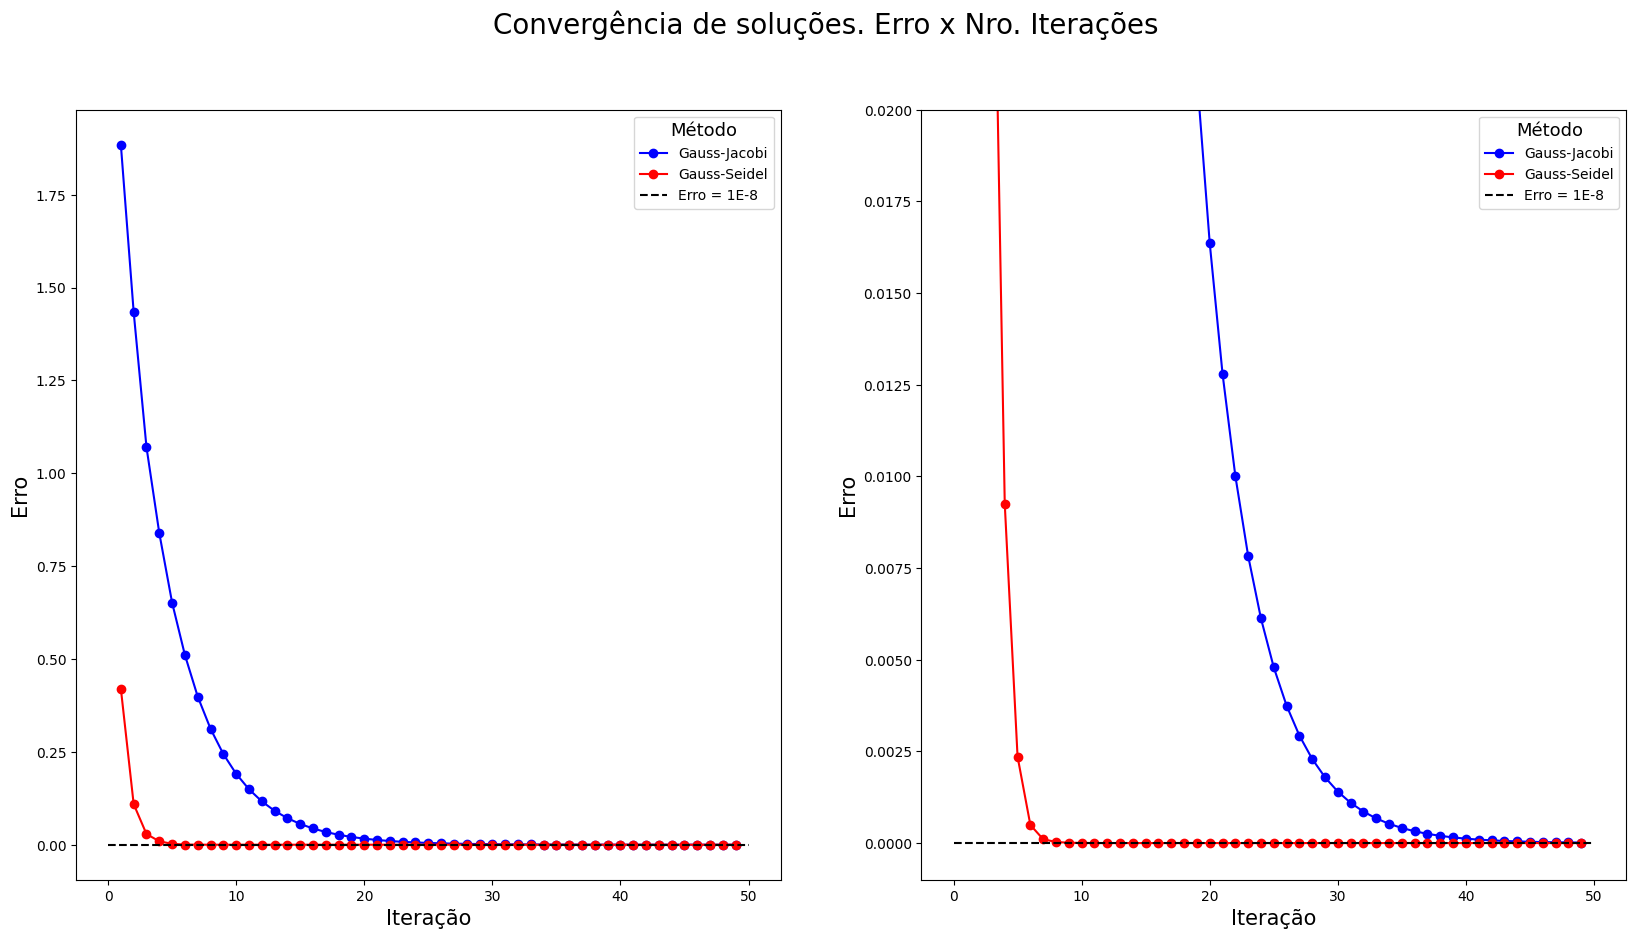

In [50]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
horiz = [y[i][2] for i in range(len(y))]

fig.suptitle('Convergência de soluções. Erro x Nro. Iterações', fontsize=20)

ax[0].plot(horiz, [y[i][0] for i in range(len(y))], '-bo', label='Gauss-Jacobi')
ax[0].plot(horiz, [y[i][1] for i in range(len(y))], '-ro', label='Gauss-Seidel')
ax[0].hlines(1E-8, 0, 50, linestyle='dashed', colors='black', label='Erro = 1E-8')

ax[0].set_xlabel('Iteração', {'size': 15})
ax[0].set_ylabel('Erro', {'size': 15})
ax[0].legend(title='Método', title_fontsize=13)

ax[1].plot(horiz, [y[i][0] for i in range(len(y))], '-bo', label='Gauss-Jacobi')
ax[1].plot(horiz, [y[i][1] for i in range(len(y))], '-ro', label='Gauss-Seidel')
ax[1].hlines(1E-8, 0, 50, linestyle='dashed', colors='black', label='Erro = 1E-8')

ax[1].set_xlabel('Iteração', {'size': 15})
ax[1].set_ylabel('Erro', {'size': 15})
ax[1].legend(title='Método', title_fontsize=13)

ax[1].set_ylim(-0.001,0.02)

plt.show()

Notamos que para GJ a convergência para o resultado com precisão de 1E-8 ocorre já por volta de 10 iterações, enquanto para GS a convergência para a mesma precisão ocorre por volta de 50 iterações

Entendemos a otimização do método GS em relação ao GJ devido à utilização de valores atualizados da linha $i-1$ cálculo da linha $i$, o que não ocorre para GJ

Por exemplo, sendo $Ax = b$, como sistema de equações temos

$$
a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1 \\
a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n = b_1 \\
... \\
a_{n1}x_1 + a_{n2}x_2 + ... + a_{nn}x_n = b_n
$$

$$
x_1 = [b_1 - (a_{12}x_2 + ... + a_{1n}x_n)] / a_{11} \\
x_2 = [b_2 - (a_{21}x_1 + ... + a_{2n}x_n)] / a_{22} \\
... \\
x_n = [b_n - (a_{n1}x_2 + ... + a_{n-1,n}x_{n-1})] / a_{nn} \\
$$

Podemos pegar por exemplo os valores

$$
x_1 = [b_1 - (a_{12}x_2 + ... + a_{1n}x_n)] / a_{11} \\
x_2 = [b_2 - (a_{21}x_1 + ... + a_{2n}x_n)] / a_{22}
$$

Após a primeira iteração teremos

$$
x_1 \to x_1^{1} = [b_1 - (a_{12}x_2^0 + ... + a_{1n}x_n^0)] / a_{11} \\
x_2 \to x_2^{1} = [b_2 - (a_{21}x_1^0 + ... + a_{2n}x_n^0)] / a_{22}
$$

Já para GS, utilizamos o valor calculado de $x_1^1$ para calcular $x_2^1$, isto é

$$
x_1 \to x_1^{1} = [b_1 - (a_{12}x_2^0 + ... + a_{1n}x_n^0)] / a_{11} \\
x_2 \to x_2^{1} = [b_2 - (a_{21}x_1^1 + ... + a_{2n}x_n^0)] / a_{22}
$$

de modo que mesmo na iteração $k=1$, para $x_2^1$ já consideramos o ganho da iteração sobre $x_1^1$

Por isso GS apresenta convergência mais rápida em relação a GJ

Questão 3

Definição da classe para calculo de zeros de função

In [77]:
class FuncZeros:
  def __init__(self, max_it = 5000, epsilon = 0.001, forceReturnResult = False) -> None:
    self.MAX_ITERATION = max_it
    self.epsilon = epsilon
    self.forceReturnResult = forceReturnResult

  def bissection(self, func, a, b):
    """ Obter solução x tal que f(x) = 0 via algoritmo de bisseção dentro do intervalo [a,b]

    func : function
      função f(x)
    a : float
      limite inferior do intervalo a ser verificado
    b: float
      limite superior do intervalo a ser verificado
    """
    x = (a+b)/2
    erro = np.inf

    k = 0
    while erro > self.epsilon:
      if func(a) * func(x) < 0: b = x 
      else: a = x

      x0 = x
      x = (a+b)/2
      erro = abs(x-x0)
      k += 1
      if k >= self.MAX_ITERATION and self.forceReturnResult: 
        return x

    return x
  
  def newton(self, func, dfunc, x0):
    """ Obter solução x tal que f(x) = 0 via algoritmo de Newton

    func : function
      função f(x)
    dfunc : function
      derivada de f(x) -- df/dx
    x0: float
      valor inicial
    """
    k = 0
    x = x0
    while k < self.MAX_ITERATION:
      dx = func(x) / dfunc(x)
      x -= dx
      if abs(dx) < self.epsilon:
        return x
    
    if (self.forceReturnResult): return x

    return None
  
  def newton_jacobian(self, funcs, jacobian, x0):
    """ Obter solução x tal que f(x) = 0 via algoritmo de Newton para sistemas

    funcs : ndarray[function]
      vetor 1D com funções do sistema 
    jacobian : ndarray[[function]]
      matriz 2D com Jacobiana (parciais de f(x))
    x0: ndarray
      vetor 1D com valores iniciais
    """
    k = 0
    x = x0
    while k < self.MAX_ITERATION:
      calc_jac = jacobian(*list(x0))
      calc_funcs = funcs(*list(x0))

      jacInv = np.linalg.inv(calc_jac)
      v = np.matmul(jacInv, calc_funcs)
      x -= v
      k += 1
      if np.linalg.norm(v) < self.epsilon:
        return x
      
    if (self.forceReturnResult): return x
    
    return None


Questão 3a

O momento em que a trajetória do projétil encontra o morro, conhecendo-se as funções que descrevem o morro e o projétil pode ser encontrada igualando ambas funções de modo que

$$
p(x) = -x^{4}+7.7x^{3}-18x^{2}+13.6x
$$

$$
q(x) = -x^{2}+5x+0.75
$$

$$
p(x) = q(x)
$$

Isso acontece quando

$$
-x^{2}+5x+0.75 = -x^{4}+7.7x^{3}-18x^{2}+13.6x
$$

Ou, reformulando para termos uma igualdade em 0

$$
-x^4 + 7.7x^3 - 17x^2 + 8.6x - 0.75 = 0
$$

Como tal função possui 4 raízes e queremos apenas o momento em que o projétil encontra o morro, queremos a solução para o intervalo [3,3.2] (conforme na figura na questão)

Apenas como comparativo, notamos que o valor que objetivamos está em $x \approx 3.173$, o que já valida o intervalo utilizado

![image.png](questao3a.png)

In [83]:
# max_it = 5: máximo de iterações
fz = FuncZeros(max_it=5, epsilon=0.001)

p = lambda x : -x**4+7.7*(x**3)-18*(x**2)+13.6*x
q = lambda x : -x**2+5*x+0.75

f = lambda x : -x**4 + 7.7*(x**3) - 17*(x**2) + 8.6*x - 0.75
a = 3
b = 3.2
x0 = fz.bissection(f, a, b)

print('Sendo a igualdade f(x0) = 0')
print('x0 =', x0)
print()
print('Sendo p(x0) altura')
print('p(x0) = ', p(x0))


Sendo a igualdade f(x0) = 0
x0 = 3.17265625

Sendo p(x0) altura
p(x0) =  6.546101510113125


Que conferem com os resultados esperados via análise gráfica

Questão 3b

Agora tentamos construir uma função $\mathcal{R}^2 \to \mathcal{R}^2$

$$
p(x,y) = -x^{4}+7.7x^{3}-18x^{2}+13.6x - y
$$

$$
q(x, y) = -x^{2}+5x+0.75 - y
$$

De modo que

$$

F = 
\begin{bmatrix}
  p(x,y) \\
  q(x,y)
\end{bmatrix}
=
\begin{bmatrix}
  -x^{4}+7.7x^{3}-18x^{2}+13.6x - y \\
  -x^{2}+5x+0.75 - y
\end{bmatrix}

$$

$$

J = 
\begin{bmatrix}
  \partial_{x}p(x,y) & \partial_{y}p(x,y) \\
  \partial_{x}q(x,y) & \partial_{y}q(x,y)
\end{bmatrix}
=
\begin{bmatrix}
  -4x^3 + 23.1x^2 - 36x + 13.6 & -1 \\
  -2x + 5 & -1 
\end{bmatrix}


$$

E nosso sistema linear (iterativo em $k = 1, 2,... N$) é dado por

$$
J(x_k)v_k = -F(x_k)
$$

In [79]:
fz = FuncZeros(max_it=5, epsilon=0.001)

f1 = lambda x1, x2 : -x1**4 + 7.7*(x1**3) - 18*(x1**2) + 13.6*x1 - x2
f2 = lambda x1, x2 : -x1**2 + 5*x1 + 0.75 - x2

funcs = lambda x1, x2 : np.array([
  f1(x1, x2), f2(x1, x2)
])

j11 = lambda x1 : -4*(x1**3) + 23.1*(x1**2) - 36*x1 + 13.6
j12 = -1
j21 = lambda x1 : -2*x1 + 5
j22 = -1

jacobian = lambda x1, x2 : np.array([
  [j11(x1), j12],
  [j21(x1), j22]
])

x0 = np.array([3.2, 6.])
x1 = fz.newton_jacobian(funcs, jacobian, x0)
print(x1)


[3.1729163  6.54718365]


Sendo compatível com o resultado do método utilizado na questão 3a

In [80]:
# Zeros calculados como valores esperados
#  usando coeficientes do polinomio -x^4 + 7.7x^3 - 17x^2 + 8.6x - 0.75 = 0
x_expect = np.roots([-1, 7.7, -17, 8.6, -0.75])
print(x_expect)

[3.86007415 3.1729163  0.55708788 0.10992166]


In [81]:
# Pegando apenas o segundo valor de x0 tal que f(x0) = 0
x0_expect = x_expect[1]
print(x0_expect)

3.17291630469725


In [85]:
fz = FuncZeros(epsilon=0.001, forceReturnResult=True)

x0 = np.array([1,0,0,0,0,0])

y = []
for i in range(1, 8):
    fz.MAX_ITERATION = i

    # MÉTODO BISSEÇÃO
    p = lambda x : -x**4+7.7*(x**3)-18*(x**2)+13.6*x
    q = lambda x : -x**2+5*x+0.75

    f = lambda x : -x**4 + 7.7*(x**3) - 17*(x**2) + 8.6*x - 0.75
    a = 3
    b = 3.2
    x0 = fz.bissection(f, a, b)

    bissection = x0
    normB = abs(x0_expect - bissection)

    # MÉTODO NEWTON
    f1 = lambda x1, x2 : -x1**4 + 7.7*(x1**3) - 18*(x1**2) + 13.6*x1 - x2
    f2 = lambda x1, x2 : -x1**2 + 5*x1 + 0.75 - x2

    funcs = lambda x1, x2 : np.array([
    f1(x1, x2), f2(x1, x2)
    ])

    j11 = lambda x1 : -4*(x1**3) + 23.1*(x1**2) - 36*x1 + 13.6
    j12 = -1
    j21 = lambda x1 : -2*x1 + 5
    j22 = -1

    jacobian = lambda x1, x2 : np.array([
    [j11(x1), j12],
    [j21(x1), j22]
    ])

    x0 = np.array([3, 6.])
    x1 = fz.newton_jacobian(funcs, jacobian, x0)
    
    NewtonJacobian = x1[0]
    normNJ = abs(x0_expect - NewtonJacobian)

    # Armazenar em y o resultado das normas Ax - b
    #  para GJ (Gauss-Jacobi) e GS (Gauss-Seidel) 
    y.append([normB, normNJ, i])

# Para visualização, mostrar os 15 primeiros valores da tabela com o cabeçalho 'h'
h = ['Erro Bis', 'Erro Newton', 'n']
print('{:<18s} {:<20s} {:<25s}'.format(*h))
for val in y[:15]:
    print('{:.8f} {:^26.8f} {:^6}'.format(*val))

Erro Bis           Erro Newton          n                        
0.02291630         0.01137784           1   
0.00208370         0.00009244           2   
0.01041630         0.00000001           3   
0.00416630         0.00000001           4   
0.00104130         0.00000001           5   
0.00052120         0.00000001           6   
0.00026005         0.00000001           7   


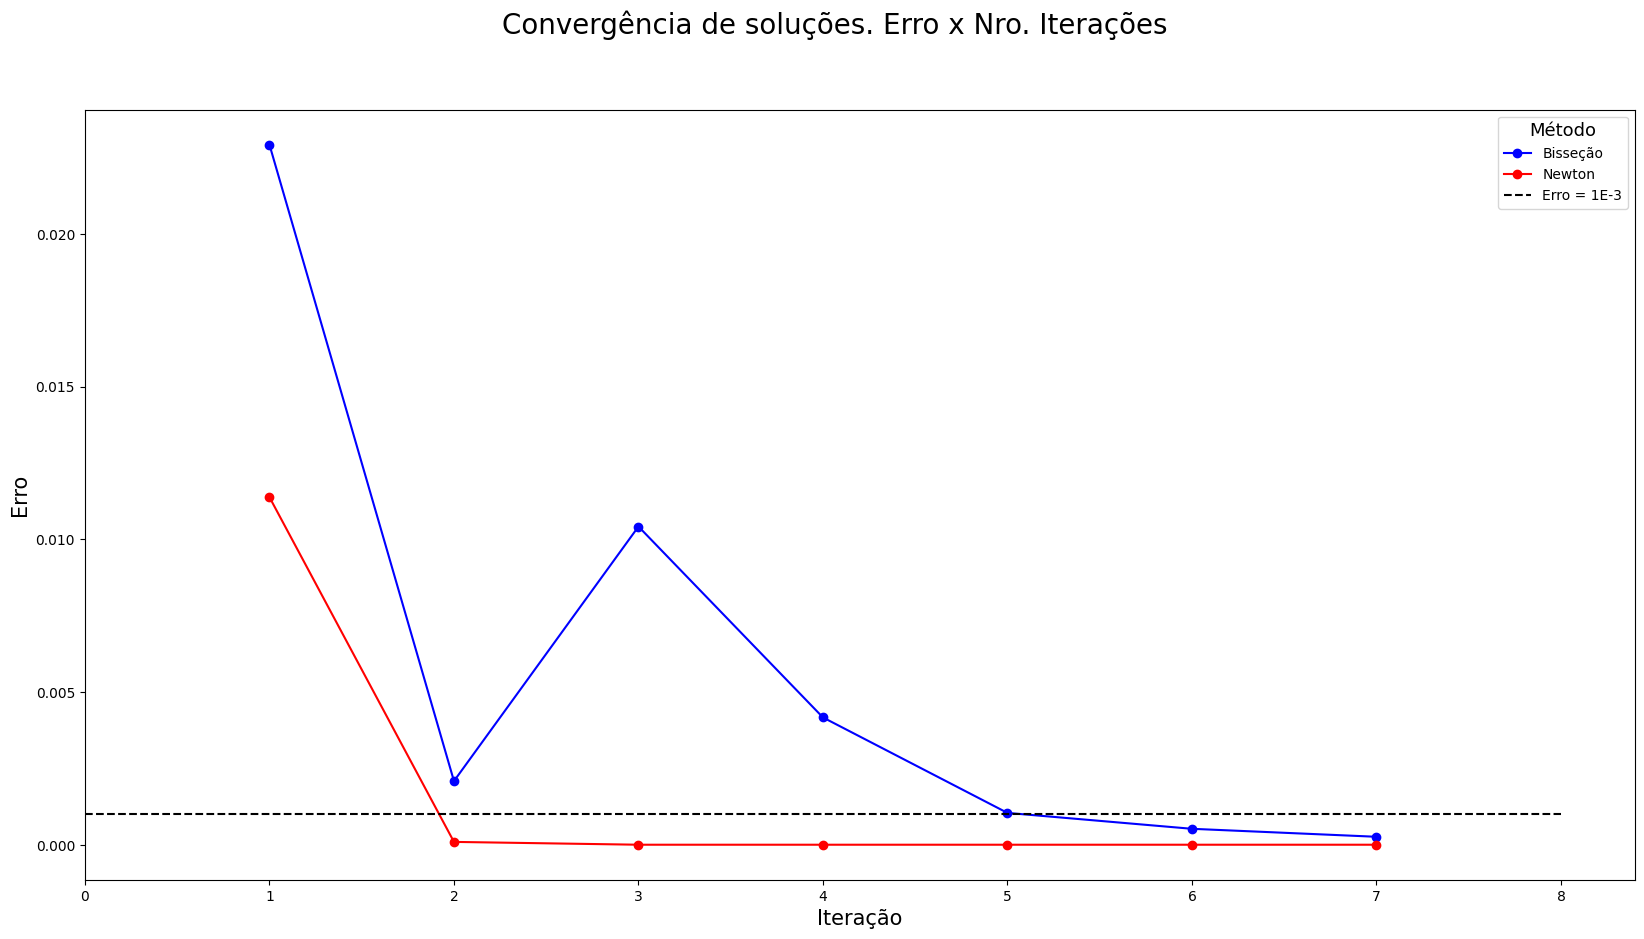

In [91]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
horiz = [y[i][2] for i in range(len(y))]

fig.suptitle('Convergência de soluções. Erro x Nro. Iterações', fontsize=20)

ax.plot(horiz, [y[i][0] for i in range(len(y))], '-bo', label='Bisseção')
ax.plot(horiz, [y[i][1] for i in range(len(y))], '-ro', label='Newton')
ax.hlines(1E-3, 0, 8, linestyle='dashed', colors='black', label='Erro = 1E-3')

ax.set_xlabel('Iteração', {'size': 15})
ax.set_ylabel('Erro', {'size': 15})
ax.legend(title='Método', title_fontsize=13)

ax.set_xlim(-0.001,)

plt.show()

Notamos que o método de newton converge a uma taxa mais elevada que o méotodo da bisseção. Isso porque Newton consiste de algoritmo de ponto fixo, cuja ordem de convergência é quadrática, diferente da bisseção, cuja ordem de convergência é linear